## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np

## Load Data

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

## Data Wrangling

In [3]:
movies['year'] = movies['title'].str.extract(r"\(([A-Za-z0-9]{4})\)$")

In [4]:
movies['year'] = pd.to_numeric(movies['year'], downcast="integer")

In [5]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


In [6]:
movies['genres'] = movies['genres'].str.split('|')

Converting table to 1NF for visualization purposes

In [7]:
lengths  = list(map(len, movies['genres'].values))

In [8]:
movies = pd.DataFrame({'movieId': np.repeat(movies['movieId'], lengths),
                      'title': np.repeat(movies['title'], lengths),
                      'genre': np.concatenate(movies['genres'].values),
                      'year': np.repeat(movies['year'], lengths)})

In [9]:
movies

,movieId,title,genre,year
0,1,Toy Story (1995),Adventure,1995.0
0,1,Toy Story (1995),Animation,1995.0
0,1,Toy Story (1995),Children,1995.0
0,1,Toy Story (1995),Comedy,1995.0
0,1,Toy Story (1995),Fantasy,1995.0
...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018.0


In [10]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Gathering and Plotting

In [11]:
grouped = movies.groupby(['year','genre'])

In [12]:
first_visual = grouped.count().reset_index().drop(columns='movieId').rename(columns={"title":"count"})

In [13]:
first_visual

,year,genre,count
0,1902.0,Action,1
1,1902.0,Adventure,1
2,1902.0,Fantasy,1
3,1902.0,Sci-Fi,1
4,1903.0,Crime,1
...,...,...,...
1496,2018.0,Horror,4
1497,2018.0,Mystery,5
1498,2018.0,Romance,1
1499,2018.0,Sci-Fi,13


In [14]:
first_pivoted = first_visual.pivot(index='year', columns='genre', values='count').fillna(0)
first_pivoted

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1903.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1908.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1916.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.0,0.0,61.0,35.0,15.0,15.0,115.0,38.0,17.0,117.0,15.0,0.0,27.0,14.0,5.0,16.0,35.0,32.0,60.0,8.0,3.0
2015.0,3.0,63.0,45.0,19.0,14.0,104.0,30.0,19.0,101.0,21.0,0.0,36.0,1.0,1.0,16.0,21.0,41.0,57.0,2.0,4.0
2016.0,7.0,48.0,36.0,22.0,13.0,75.0,15.0,13.0,69.0,22.0,0.0,16.0,0.0,0.0,8.0,18.0,29.0,41.0,3.0,1.0


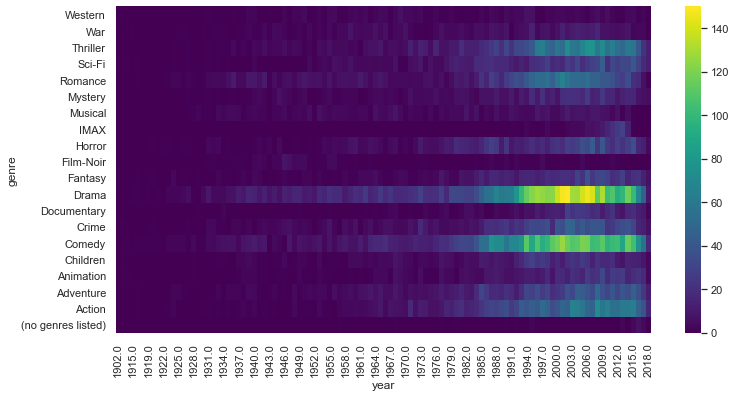

In [15]:
sns.set(rc={"figure.figsize":(12, 6)}) #width=8, height=4
first_heat = sns.heatmap(first_pivoted.transpose(), cmap='viridis')
first_heat.invert_yaxis()

The above visualization shows the frequency of movies in certain genres (y-axis) per year (x-axis). From 2000-2012, Drama and Comedy movies show the highest frequencies. Runner-ups are Thriller and Action in the same period of time.

In the next visualization, we're interested in seeing the overall distribution of movies ratings per genre over all time.

In [16]:
second_visual = movies.join(ratings.set_index('movieId'), on='movieId')
second_visual

,movieId,title,genre,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1995.0,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure,1995.0,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure,1995.0,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure,1995.0,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure,1995.0,17.0,4.5,1.305696e+09
...,...,...,...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,2017.0,184.0,3.5,1.537110e+09
9739,193585,Flint (2017),Drama,2017.0,184.0,3.5,1.537110e+09
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018.0,184.0,3.5,1.537110e+09
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018.0,184.0,3.5,1.537110e+09


<AxesSubplot:xlabel='rating', ylabel='genre'>

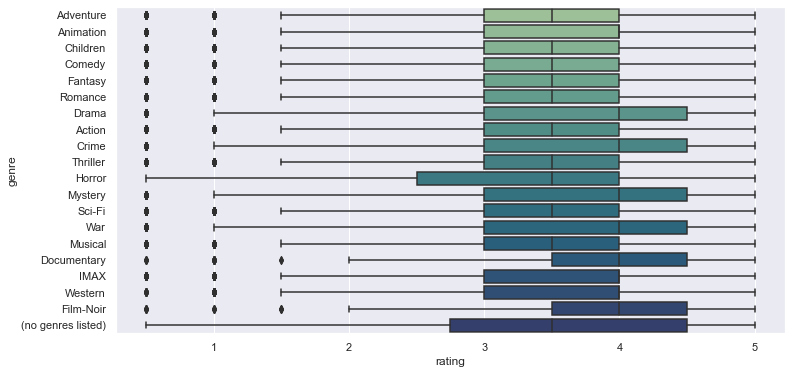

In [17]:
sns.boxplot(x=second_visual['rating'], y=second_visual['genre'], palette="crest")

Drama, Crime, Mystery, War, Documentary, and Film-Noir genre movies exhibit higher ratings on average. While horror movies exhibit a larger amount of ratings between 3.5 and 4, around 25% of horror movies have ratings between 2.5 and 3.5, which is a lower range for the second quartile than any other movie genre. 